In [55]:
import pandas as pd
test_set_df = pd.read_csv("/kaggle/input/paper-test-set/testset.csv")
test_set_df.head()

,directory,class
0,/kaggle/input/augmented-xray-dataset/COVID19_P...,pneumonia
1,/kaggle/input/augmented-xray-dataset/COVID19_P...,pneumonia
2,/kaggle/input/augmented-xray-dataset/COVID19_P...,normal
3,/kaggle/input/augmented-xray-dataset/COVID19_P...,pneumonia
4,/kaggle/input/augmented-xray-dataset/COVID19_P...,pneumonia


In [51]:
batch_size = 24
size = (224,224,3)
img_width = img_hight = size[0]
random_state = 7
classes = list(test_set_df['class'].unique())
classes

['covid', 'normal', 'pneumonia']

In [57]:
test_set = test_datagen.flow_from_dataframe(test_set_df, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False, seed=42,shuffle = False)


Found 687 non-validated image filenames belonging to 3 classes.


In [58]:
# from keras.preprocessing.image import ImageDataGenerator

# test_datagen = ImageDataGenerator(rescale=1./255)
# test_set = test_datagen.flow_from_dataframe(test_set_df, 
#                                             target_size=(224, 224), batch_size=24,
#                                             class_mode='categorical', shuffle=False)

In [59]:
import keras
model1=keras.models.load_model('/kaggle/input/paper-test-set/GP_paper.h5')

In [60]:
model1.evaluate(test_set)

29/29 [==============================] - 158s 5s/step - loss: 0.5732 - accuracy: 0.9316


[0.5731599926948547, 0.9315866231918335]

In [61]:
y_pred=model1.predict(test_set)
y_pred

array([[0.05901125, 0.06069562, 0.9552877 ],
       [0.3021739 , 0.97890306, 0.7046354 ],
       [0.14704177, 0.9597691 , 0.63022554],
       ...,
       [0.01431945, 0.1573827 , 0.98750067],
       [0.24440399, 0.9785458 , 0.16298226],
       [0.07174391, 0.98717624, 0.3074212 ]], dtype=float32)

In [62]:
import numpy as np

y_pred1=np.argmax(y_pred,axis=1)   #argmax: Returns the indices of the maximum values along an axis.
y_pred1

array([2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0,
       0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1,

In [63]:
from sklearn.metrics import accuracy_score,  confusion_matrix

confusion_matrix = confusion_matrix(test_set.labels,y_pred1)
print(confusion_matrix)

print(accuracy_score(test_set.labels,y_pred1)*100)

[[223   3   3]
 [  9 214   6]
 [  2  24 203]]
93.15866084425036


In [64]:
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['COVID19','NORMAL','PNEUMONIA'], 
                     columns = ['COVID19','NORMAL','PNEUMONIA'])

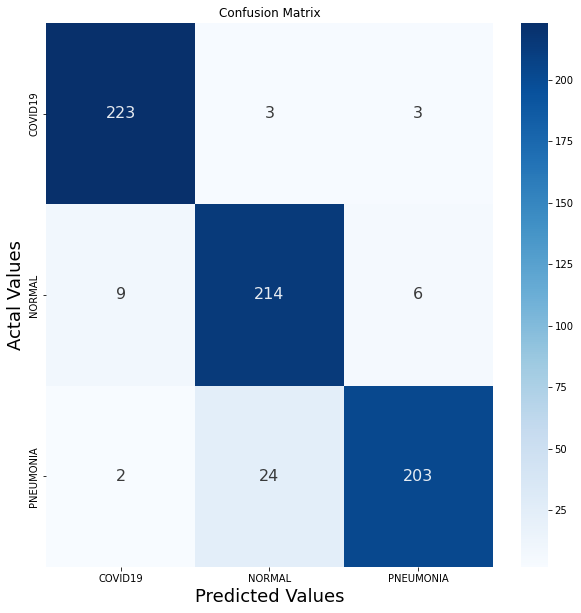

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the confusion matrix
plt.figure(figsize=(10,10))
#sns.heatmap(cm_df, annot=True,cmap=sns.cubehelix_palette(as_cmap=True),fmt="")

sns.heatmap(cm_df, annot=True,cmap='Blues',fmt="",annot_kws={'fontsize':16,'alpha':0.9})
# ,annot_kws={'fontsize':16, 
#            'fontstyle':'italic',  
#            'color':"k",
#            'alpha':0.9, 
#            'backgroundcolor':'w',
#            'verticalalignment':'center',
#            }
plt.title('Confusion Matrix')
plt.ylabel('Actal Values',fontsize=18)
plt.xlabel('Predicted Values',fontsize=18)
plt.show()

In [67]:
from sklearn.metrics import f1_score
f1_score = f1_score(test_set.labels,y_pred1, average=None)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(test_set.labels,y_pred1)
accuracy_score

0.9315866084425036

In [69]:
from sklearn.metrics import classification_report
target_names = ['COVID19','NORMAL','PNEUMONIA']
report=classification_report(test_set.labels,y_pred1, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     COVID19       0.95      0.97      0.96       229
      NORMAL       0.89      0.93      0.91       229
   PNEUMONIA       0.96      0.89      0.92       229

    accuracy                           0.93       687
   macro avg       0.93      0.93      0.93       687
weighted avg       0.93      0.93      0.93       687



In [70]:
reportdic=classification_report(test_set.labels,y_pred1, target_names=target_names, output_dict=True)
print(reportdic)

{'COVID19': {'precision': 0.9529914529914529, 'recall': 0.9737991266375546, 'f1-score': 0.9632829373650108, 'support': 229}, 'NORMAL': {'precision': 0.8879668049792531, 'recall': 0.9344978165938864, 'f1-score': 0.9106382978723403, 'support': 229}, 'PNEUMONIA': {'precision': 0.9575471698113207, 'recall': 0.8864628820960698, 'f1-score': 0.9206349206349206, 'support': 229}, 'accuracy': 0.9315866084425036, 'macro avg': {'precision': 0.9328351425940089, 'recall': 0.9315866084425036, 'f1-score': 0.9315187186240905, 'support': 687}, 'weighted avg': {'precision': 0.9328351425940089, 'recall': 0.9315866084425036, 'f1-score': 0.9315187186240904, 'support': 687}}


In [71]:
reportdic_df = pd.DataFrame(reportdic)
reportdic_df.head()

,COVID19,NORMAL,PNEUMONIA,accuracy,macro avg,weighted avg
precision,0.952991,0.887967,0.957547,0.931587,0.932835,0.932835
recall,0.973799,0.934498,0.886463,0.931587,0.931587,0.931587
f1-score,0.963283,0.910638,0.920635,0.931587,0.931519,0.931519
support,229.000000,229.000000,229.000000,0.931587,687.000000,687.000000


In [72]:
reportdic_df = reportdic_df.drop(columns=['macro avg', 	'weighted avg','accuracy'])

reportdic_df = reportdic_df.drop(labels='support', axis=0)
reportdic_df= reportdic_df.mul(100)
reportdic_df.head()

,COVID19,NORMAL,PNEUMONIA
precision,95.299145,88.796680,95.754717
recall,97.379913,93.449782,88.646288
f1-score,96.328294,91.063830,92.063492


In [73]:
 pd.DataFrame.to_csv(reportdic_df, 'reportresults.csv', index=False)


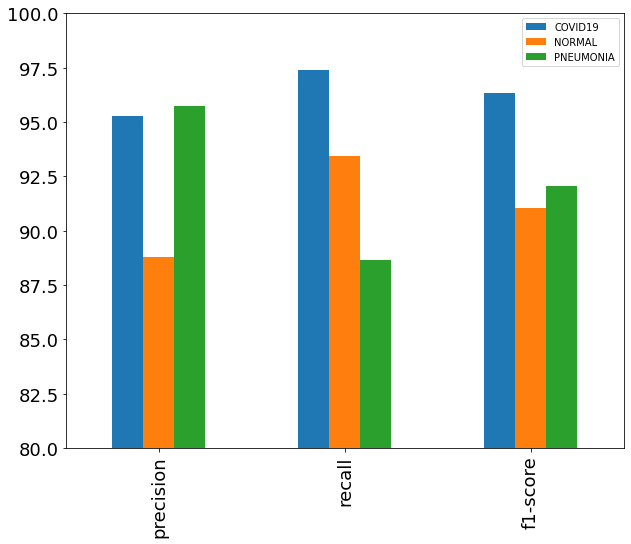

In [74]:
reportdic_df.plot(kind = 'bar',figsize=(10,8),fontsize=18,ylim=(80,100))
  
  
# show the plot
plt.show()

In [75]:
history = pd.read_csv("/kaggle/input/paper-test-set/paper_lstm_his.csv")
history.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.981662,0.766084,1.471369,0.351312,0.0001
1,0.818625,0.831355,1.783187,0.333819,0.0001
2,0.749092,0.869144,2.332434,0.332362,0.0001
3,0.704464,0.883198,1.252412,0.628280,0.0001
4,0.648723,0.908182,0.805953,0.844023,0.0001


<AxesSubplot:title={'center':'Training and Validation Losses'}, xlabel='epoches', ylabel='losses'>

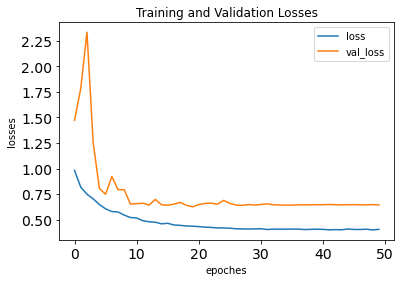

In [76]:
history.plot( y=['loss','val_loss'], kind='line',xlabel='epoches',ylabel='losses',title='Training and Validation Losses',fontsize=14)


<AxesSubplot:title={'center':'Training and Validation accuracy'}, xlabel='epoches', ylabel='accuracy'>

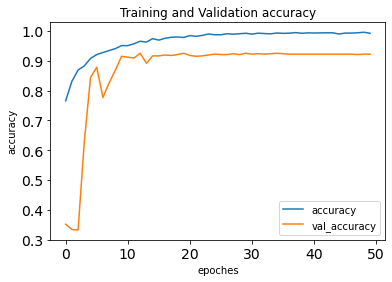

In [77]:
history.plot( y=['accuracy','val_accuracy'], kind='line',
             xlabel='epoches',ylabel='accuracy',title='Training and Validation accuracy',fontsize=14)

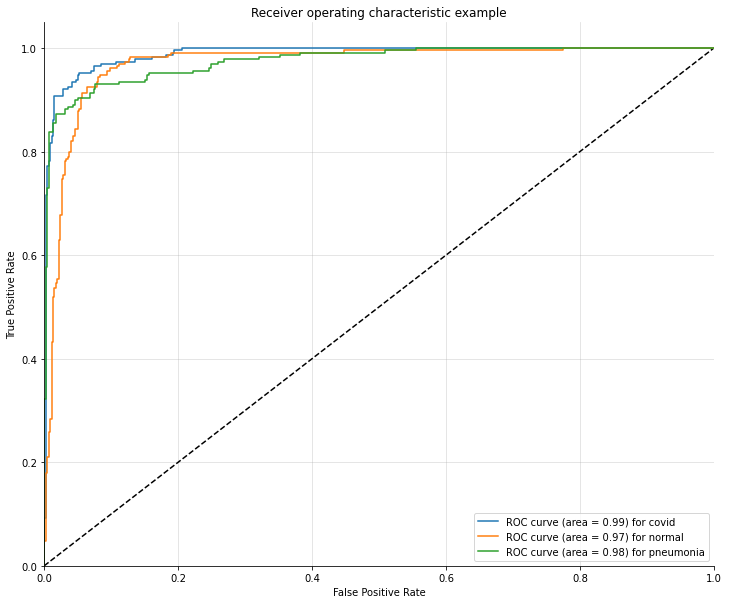

In [78]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

class_to_label_map = {2 : 'pneumonia', 0 : 'covid', 1 : 'normal'}
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(test_set.classes,y_pred, n_classes=3, figsize=(12, 10))